In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [4]:
cites_df = pd.read_csv('comptab_2018-01-29 16_00_comma_separated.csv')

In [5]:
cites_df

,Year,App.,Taxon,Class,Order,Family,Genus,Importer,Exporter,Origin,Importer reported quantity,Exporter reported quantity,Term,Unit,Purpose,Source
0,2016,I,Aquila heliaca,Aves,Falconiformes,Accipitridae,Aquila,TR,NL,CZ,NaN,1.0,bodies,NaN,T,C
1,2016,I,Aquila heliaca,Aves,Falconiformes,Accipitridae,Aquila,XV,RS,RS,NaN,1.0,bodies,NaN,Q,O
2,2016,I,Haliaeetus albicilla,Aves,Falconiformes,Accipitridae,Haliaeetus,BE,NO,NaN,NaN,43.0,feathers,NaN,S,W
3,2016,I,Haliaeetus albicilla,Aves,Falconiformes,Accipitridae,Haliaeetus,BE,NO,NaN,NaN,43.0,specimens,NaN,S,W
4,2016,I,Haliaeetus albicilla,Aves,Falconiformes,Accipitridae,Haliaeetus,DK,IS,NaN,700.0,NaN,specimens,NaN,S,W
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67156,2017,III,Canis aureus,Mammalia,Carnivora,Canidae,Canis,US,ET,NaN,NaN,7.0,trophies,NaN,H,W
67157,2017,III,Sarcoramphus papa,Aves,Falconiformes,Cathartidae,Sarcoramphus,JP,PE,NaN,NaN,2.0,live,NaN,T,F
67158,2017,III,Daboia russelii,Reptilia,Serpentes,Viperidae,Daboia,RS,IT,US,200.0,NaN,specimens,NaN,T,F
67159,2017,III,Civettictis civetta,Mammalia,Carnivora,Viverridae,Civettictis,FR,ET,NaN,NaN,635.1,musk,kg,T,R


In [6]:
cites_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,67161.0,2016.002293,0.047831,2016.000000,2016.0,2016.0,2016.0,2017.0
Importer reported quantity,31866.0,4382.425368,144910.274235,0.000000,3.0,12.0,80.0,19524978.0
Exporter reported quantity,44021.0,4443.878401,157379.356988,0.000002,2.0,12.0,82.0,21543618.0


In [7]:
cites_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67161 entries, 0 to 67160
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Year                        67161 non-null  int64  
 1   App.                        67161 non-null  object 
 2   Taxon                       67161 non-null  object 
 3   Class                       46937 non-null  object 
 4   Order                       67104 non-null  object 
 5   Family                      66700 non-null  object 
 6   Genus                       65702 non-null  object 
 7   Importer                    67090 non-null  object 
 8   Exporter                    66588 non-null  object 
 9   Origin                      25643 non-null  object 
 10  Importer reported quantity  31866 non-null  float64
 11  Exporter reported quantity  44021 non-null  float64
 12  Term                        67161 non-null  object 
 13  Unit                        640

In [8]:
cites_df.isna().sum()

Year                              0
App.                              0
Taxon                             0
Class                         20224
Order                            57
Family                          461
Genus                          1459
Importer                         71
Exporter                        573
Origin                        41518
Importer reported quantity    35295
Exporter reported quantity    23140
Term                              0
Unit                          60759
Purpose                        6059
Source                          544
dtype: int64

In [9]:
cites_df.shape

(67161, 16)

In [10]:
# top 20 count of each value in Term
cites_df['Term'].value_counts()[:20]

live                        33862
leather products (small)    10106
specimens                    2852
skins                        2271
raw corals                   1903
trophies                     1603
garments                     1456
caviar                       1206
extract                       965
bodies                        915
leather products (large)      866
skin pieces                   748
carvings                      693
ivory carvings                540
derivatives                   454
skulls                        396
jewellery                     386
medicine                      380
roots                         353
feathers                      336
Name: Term, dtype: int64

<AxesSubplot:>

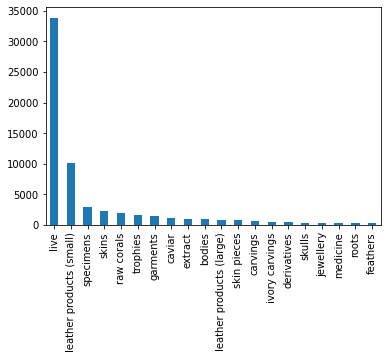

In [13]:
# visualize the count in a chart
cites_df['Term'].value_counts()[:20].plot(kind='bar')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'T'),
  Text(1, 0, 'P'),
  Text(2, 0, 'S'),
  Text(3, 0, 'H'),
  Text(4, 0, 'Q'),
  Text(5, 0, 'M'),
  Text(6, 0, 'Z'),
  Text(7, 0, 'B'),
  Text(8, 0, 'E'),
  Text(9, 0, 'G'),
  Text(10, 0, 'L'),
  Text(11, 0, 'N')])

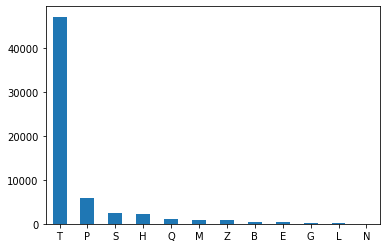

In [14]:
# visualize the count in a chart
cites_df['Purpose'].value_counts()[:20].plot(kind='bar')
plt.xticks(rotation=0)

In [15]:
temp_df = cites_df[~cites_df['Importer reported quantity'].isna() & ~cites_df['Exporter reported quantity'].isna()]
temp_df

,Year,App.,Taxon,Class,Order,Family,Genus,Importer,Exporter,Origin,Importer reported quantity,Exporter reported quantity,Term,Unit,Purpose,Source
24,2016,I,Asarcornis scutulata,Aves,Anseriformes,Anatidae,Asarcornis,GB,JE,GB,1.0,1.0,bodies,NaN,S,C
25,2016,I,Asarcornis scutulata,Aves,Anseriformes,Anatidae,Asarcornis,GB,JE,NaN,1.0,2.0,bodies,NaN,S,C
33,2016,I,Pachypodium baronii,NaN,Gentianales,Apocynaceae,Pachypodium,JP,NL,NaN,1.0,1.0,live,NaN,T,D
43,2016,I,Araucaria araucana,NaN,Pinales,Araucariaceae,Araucaria,US,NL,GB,19.0,10.0,seeds,kg,T,D
45,2016,I,Oreonax flavicauda,Mammalia,Primates,Atelidae,Oreonax,DE,PE,NaN,70.0,50.0,specimens,NaN,S,W
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66774,2016,III,Civettictis civetta,Mammalia,Carnivora,Viverridae,Civettictis,JP,FR,ET,0.3,1.9,extract,kg,T,W
66794,2016,III,Civettictis civetta,Mammalia,Carnivora,Viverridae,Civettictis,US,FR,ET,4.0,3.5,extract,kg,T,W
66803,2016,III,Civettictis civetta,Mammalia,Carnivora,Viverridae,Civettictis,US,ZM,NaN,2.0,4.0,trophies,NaN,H,W
66805,2016,III,Civettictis civetta,Mammalia,Carnivora,Viverridae,Civettictis,US,ZW,NaN,1.0,1.0,skulls,NaN,H,W


In [16]:
corr_df=temp_df.select_dtypes(include=['int64', 'float'])

In [17]:
corr_df.corr()

,Year,Importer reported quantity,Exporter reported quantity
Year,NaN,NaN,NaN
Importer reported quantity,NaN,1.000000,0.509213
Exporter reported quantity,NaN,0.509213,1.000000


Converting the Purpose from categorical to numeric

In [18]:
p = {'T':0, 'P':1, 'H':2, 'S':3, 'M':4, 'Z':5, 'Q':6, 'B':7, 'E':8, 'G':9, 'N':10}
temp_df['Purpose'] = temp_df['Purpose'].map(p).astype('int64')

In [19]:
temp_df['Purpose'].unique()
temp_df['Purpose'].value_counts()

0     7567
1      323
2      291
3      215
4      123
5      108
6       53
7       29
8       14
9        2
10       1
Name: Purpose, dtype: int64

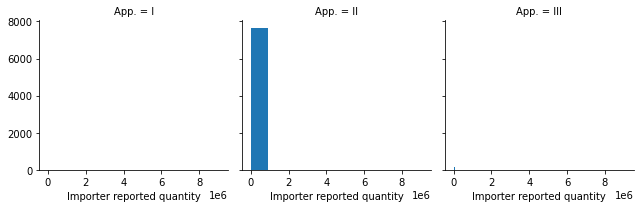

In [20]:
g = sns.FacetGrid(temp_df, col='App.')
g.map(plt.hist, 'Importer reported quantity', bins=10 )
#temp_df['App.'].value_counts()
#clean_df = temp_df.drop(columns=[Order', 'Family', 'Genus', 'Unit', 'Origin'])

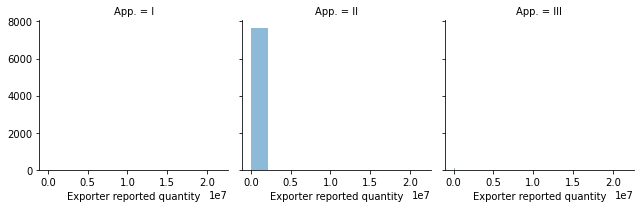

In [21]:
g = sns.FacetGrid(temp_df, col='App.')
g.map(plt.hist, 'Exporter reported quantity', alpha=.5, bins=10 )

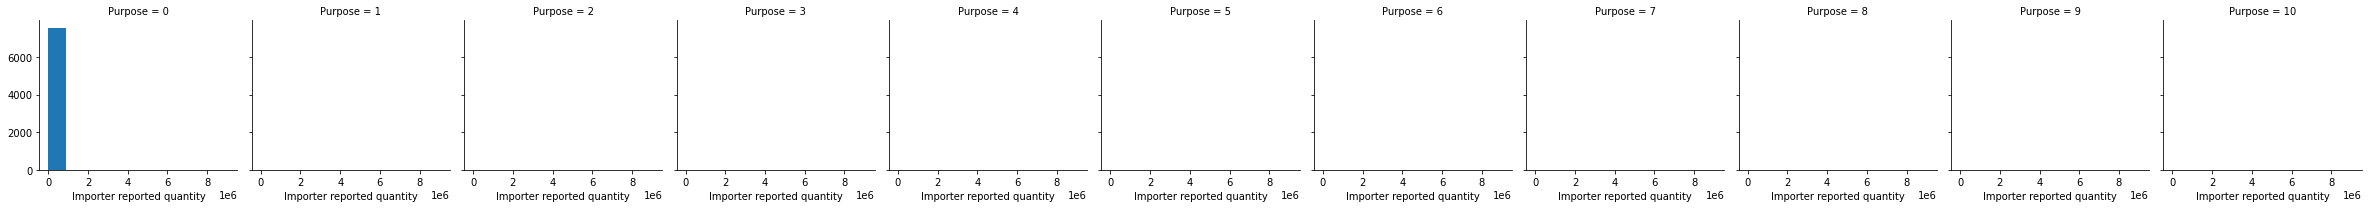

In [22]:
g = sns.FacetGrid(temp_df, col='Purpose')
g.map(plt.hist, 'Importer reported quantity', bins=10 )